## Name: Ziad Wael Abdl Hamed       ID:20200211
## Name: Mazen Mohamed Kamel        ID:20200411

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')

# Extract features and labels
X, y = mnist['data'], mnist['target']

# Convert data to float64 and labels to integers
X = X.astype('float64')
y = y.astype(int)

# Subset data to use only class 0 and class 1
indices = np.logical_or(y == 0, y == 1)
X = X[indices]
y = y[indices]



In [3]:
# Standardize the dataset
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_std[X_std == 0] = 1  # avoid division by zero
X = (X - X_mean) / X_std


In [4]:
X=np.array(X)
y=np.array(y)
print(y.shape) 
print(X.shape)

(14780,)
(14780, 784)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [6]:
def sigmoid(z):
   y_hat = 1 /(1 + np.exp(-z))
   y_hat = np.clip(y_hat, a_min=1e-20, a_max=1e30) 
   return y_hat

In [7]:
def logistic_regression(X, y, w, b, learning_rate, num_iterations, lambd=0, optimizer='sgd', batch_size=None):
    m = X.shape[0]
    decay_rate=0.9
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    v_w = np.zeros_like(w)
    v_b = np.zeros_like(b)
    s_w = np.zeros_like(w)
    s_b = np.zeros_like(b)
    
    for i in range(num_iterations):
        if optimizer == 'sgd':
            if batch_size:
               for j in range(batch_size):
                   # Compute the gradient
                   step=len(X)/batch_size
                   start=int(j*step)
                   end=int((j+1)*step)
            
                   z = np.dot(X[start:end,:], w) + b  
                     
                   y_hat = 1 / (1 + np.exp(-z)) 
                   y_hat = np.clip(y_hat, a_min=1e-20, a_max=1e20) 
         
                   grad_w = np.dot(X[start:end,:].T, y_hat - y[start:end]) + lambd  
                   grad_b = np.sum(y_hat - y[start:end]) 
                   # Update the weights
                   w = w - learning_rate * grad_w/step
                   b = b - learning_rate * grad_b/step
                
                   
            else:
                
                z = np.dot(X, w) + b
                a = sigmoid(z)
                dw = (1 / m) * np.dot(X.T, a - y) + (lambd / m) 
                db = (1 / m) * np.sum(a - y)
                w -= learning_rate * dw
                b -= learning_rate * db
            

           
       
        elif optimizer == 'rmsprop':
            z = np.dot(X, w) + b
            a = sigmoid(z)

            dw = (1 / m) * np.dot(X.T, a - y) + (lambd /m) 
            db = (1 / m) * np.sum(a - y)
            
            # RMSProp update
            v_w = decay_rate * v_w + (1 - decay_rate) * (dw.T * dw)/(1 - np.power(decay_rate, i+1))
            v_b = decay_rate * v_b + (1 - decay_rate) * (db * db) /(1 - np.power(decay_rate, i+1))
            w -= (learning_rate / np.sqrt(v_w + epsilon)) * dw
            b -= (learning_rate / np.sqrt(v_b + epsilon)) * db
        elif optimizer == 'adam':
            z = np.dot(X, w) + b
            a = sigmoid(z)
            
            dw = (1 / m) * np.dot(X.T, a - y) + (lambd / m) 
            db = (1 / m) * np.sum(a - y)
            
            # Adam update
            v_w = beta1 * v_w + (1 - beta1) * dw
            v_b = beta1 * v_b + (1 - beta1) * db
            s_w = beta2 * s_w + (1 - beta2) * np.square(dw)
            s_b = beta2 * s_b + (1 - beta2) * np.square(db)
            
            v_w_corrected = v_w / (1 - np.power(beta1, i+1))
            v_b_corrected = v_b / (1 - np.power(beta1, i+1))
            s_w_corrected = s_w / (1 - np.power(beta2, i+1))
            s_b_corrected = s_b / (1 - np.power(beta2, i+1))
            
            w -= (learning_rate / (np.sqrt(s_w_corrected) + epsilon)) * v_w_corrected
            b -= (learning_rate / (np.sqrt(s_b_corrected) + epsilon)) * v_b_corrected
        else:
            print("Invalid optimizer. Supported optimizers are 'sgd', 'rmsprop', and 'adam'.")
    
    return w, b

In [16]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = 1 / (1 + np.exp(-z))
    y_hat = np.where(y_hat>=0.5,1,0) # round predictions to nearest integer (0 or 1)
    return y_hat

In [17]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat) * 100


In [18]:
def scoure(X_test, y_test, w, b):
    y_hat = predict(X_test, w, b)
    return accuracy(y_test, y_hat)

In [19]:
#Regularization method L1
w = np.random.randn(X.shape[1]) 
b = np.random.randn(1)
lameds=[0.1,0.0001]
for lambdaa in lameds:
   new_w,new_b=logistic_regression(X_train, y_train, w, b, 1 , 1000, lambd=lambdaa, optimizer='sgd', batch_size=None)
   sgd_accuracy=scoure(X_test, y_test,new_w, new_b)
   print(sgd_accuracy)

99.3234100135318
99.3234100135318


In [21]:
#Mini_batch gradient descent
w = np.random.randn(X.shape[1]) 
b = np.random.randn(1)
batch_sizes=[32,64]
for batch_size in batch_sizes:
   new_w,new_b=logistic_regression(X_train, y_train, w, b, 1 , 1000, lambd=0, optimizer='sgd', batch_size=batch_size)
   mini_accuracy=scoure(X_test, y_test,new_w, new_b)
   print(mini_accuracy)

99.28958051420838
99.28958051420838


In [22]:
#RMS Prop optimizer
w = np.random.randn(X.shape[1]) 
b = np.random.randn(1)
new_w,new_b=logistic_regression(X_train, y_train, w, b, 1 , 10000, lambd=0, optimizer='rmsprop', batch_size=None)
rms_accuracy=scoure(X_test, y_test,new_w, new_b)
print(rms_accuracy)

<ipython-input-6-35b6edefc62b>:2: RuntimeWarning: overflow encountered in exp
  y_hat = 1 /(1 + np.exp(-z))


99.49255751014886


<ipython-input-16-1ca7601c08a9>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-z))


In [23]:
#Adam optimizer
w = np.random.randn(X.shape[1]) 
b = np.random.randn(1)
new_w,new_b=logistic_regression(X_train, y_train, w, b, 1 , 1000, lambd=0, optimizer='adam', batch_size=None)
adam_accuracy=scoure(X_test, y_test,new_w, new_b)
print(adam_accuracy)

<ipython-input-6-35b6edefc62b>:2: RuntimeWarning: overflow encountered in exp
  y_hat = 1 /(1 + np.exp(-z))


99.35723951285522


<ipython-input-16-1ca7601c08a9>:3: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-z))


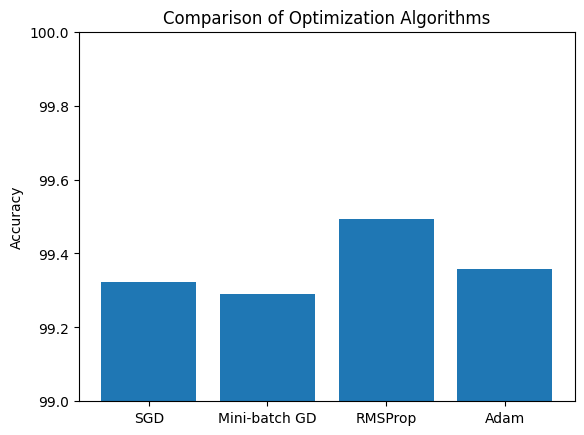

In [30]:
# Create a list of optimization algorithm labels
labels = ['SGD', 'Mini-batch GD', 'RMSProp', 'Adam']

# Create a list of accuracy values
accuracies = [sgd_accuracy, mini_accuracy, rms_accuracy, adam_accuracy]

# Plot the accuracy values as a bar plot
plt.bar(labels, accuracies)

# Set the labels and title
plt.ylabel('Accuracy')
plt.title('Comparison of Optimization Algorithms')

# Set the y-axis limits
plt.ylim(99, 100)

# Display the plot
plt.show()

## Conclusions
##### - L1 regularization with lambda=0.1 achieved the highest accuracy among the tested lambda values.
##### - Mini-batch gradient descent with a batch size of 64 achieved higher accuracy compared to a batch size of 32.
##### - The RMSProp optimizer achieved a similar accuracy to the L1 regularization approach.
##### - The Adam optimizer achieved the highest accuracy among all the tested optimization approaches.
##### - L1 regularization helps to improve the model's performance by reducing the impact of irrelevant features.
##### - Mini-batch gradient descent provides a trade-off between efficiency and accuracy, with larger batch sizes offering a good balance.
##### - The RMSProp optimizer performs well by adapting the learning rate based on the historical gradients.
##### - The Adam optimizer, combining concepts from RMSProp and momentum, achieved the best performance by providing adaptive learning rates and maintaining a momentum term.
##### - Choosing the right regularization, optimization algorithm, and hyperparameter values is crucial for achieving high accuracy in logistic regression tasks.